# HGSC EDA
Standard analysis pipeline to explore the data.

In [46]:
import scanpy as sc

In [47]:
import squidpy as sq

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# https://www.nature.com/articles/s41590-024-01943-5

In [ ]:
import os

regenerate = False
if (not os.path.exists("G:/data/HGSC/h5ad/ST_Discovery_so.h5ad")) or regenerate:
    adata = sc.read_mtx("G:/data/HGSC/Csv/ST_Discovery_so_counts.mtx").T
    metadata = pd.read_csv("G:/data/HGSC/Csv/ST_Discovery_so_metadata.csv", index_col=0)
    features = pd.read_csv("G:/data/HGSC/Csv/ST_Discovery_so_features.txt", index_col=0, header=None)
    features.index = features.index.str.strip() # remove trailing white space in gene names
    features.index.name = 'gene_symbol'
    adata.obs = metadata
    adata.var = features
    adata.obsm['spatial'] = adata.obs[['x', 'y']].to_numpy()
    adata.write_h5ad("G:/data/HGSC/h5ad/ST_Discovery_so.h5ad")
else:
    adata = sc.read_h5ad("G:/data/HGSC/h5ad/ST_Discovery_so.h5ad")
    


In [51]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,samples,patients,sites_binary,cell.types,cell.subtypes,x,y
SMI_T10_F001_c1017,SMI,848,357,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,1493.3500,3151.233
SMI_T10_F001_c102,SMI,731,319,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,2623.2000,3607.450
SMI_T10_F001_c1062,SMI,236,155,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,850.5670,3143.833
SMI_T10_F001_c1064,SMI,609,300,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,3222.7300,3152.586
SMI_T10_F001_c1075,SMI,310,174,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,78.0125,3179.012
...,...,...,...,...,...,...,...,...,...,...
SMI_T14_F020_c5758,SMI,100,63,SMI_T14_F020,HGSC89,Omentum,TNK.cell,CD4.T.cell.DN,5170.4400,431.900
SMI_T14_F020_c734,SMI,141,88,SMI_T14_F020,HGSC89,Omentum,Fibroblast,Fibroblast,768.7000,3188.400
SMI_T14_F020_c875,SMI,78,60,SMI_T14_F020,HGSC89,Omentum,Malignant,Malignant,42.5833,3070.350
SMI_T14_F020_c3288,SMI,104,58,SMI_T14_F020,HGSC89,Omentum,Fibroblast,Fibroblast,48.9889,1751.740


In [52]:
adata.obs[adata.obs['cell.types'] == 'B.cell']['nCount_RNA'].mean()

201.1215711735108

In [53]:
sample_metadata = pd.read_excel("G:/data/HGSC/sample_metadata.xlsx", index_col=0, sheet_name='Table 2b', skiprows=1)
sample_metadata = sample_metadata[sample_metadata['dataset'] == 'Discovery']
sample_metadata

,dataset,platform,n_cells,median_tpc,mean_tpc,TMA,patients,sites_binary,age,stage,...,fu_time2,outcome,pfs,BRCA1_Somatic,BRCA2_Somatic,TP53_Somatic,BRCA1_Germline,BRCA2_Germline,TP53_Germline,tmb
profile,,,,,,,,,,,,,,,,,,,,,
SMI_T10_F001,Discovery,SMI,5660,205.0,238.675618,TMA 10,HGSC1,Adnexa,58.0,III,...,775.0,Alive,775.0,WT,P,P,US,US,US,6.80
SMI_T10_F002,Discovery,SMI,8821,364.0,393.318671,TMA 10,HGSC7,Adnexa,58.0,III,...,1013.0,Alive,1013.0,P,WT,LP,US,US,US,0.53
SMI_T10_F003,Discovery,SMI,2881,300.0,445.154460,TMA 10,HGSC8,Adnexa,65.0,IV,...,781.0,Alive,200.0,WT,WT,P,US,US,US,3.16
SMI_T10_F004,Discovery,SMI,3145,286.0,376.895390,TMA 10,HGSC13,Omentum,67.0,III,...,840.0,Dead (disease),161.0,WT,WT,P,US,US,US,2.63
SMI_T10_F005,Discovery,SMI,2187,165.0,267.202561,TMA 10,HGSC15,Adnexa,33.0,IV,...,845.0,Alive,845.0,WT,WT,P,P,US,US,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMI_T14_F016,Discovery,SMI,2744,209.0,288.211735,TMA 14,HGSC61,Omentum,70.0,III,...,1955.0,Alive,1955.0,WT,WT,P,US,US,US,1.10
SMI_T14_F017,Discovery,SMI,3376,276.0,368.816647,TMA 14,HGSC63,Omentum,71.0,III,...,407.0,D/c to hospice (likely dead of disease),297.0,WT,WT,P,US,US,US,0.50
SMI_T14_F018,Discovery,SMI,9961,189.0,210.500452,TMA 14,HGSC89,Adnexa,53.0,III,...,1729.0,Dead (disease),412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


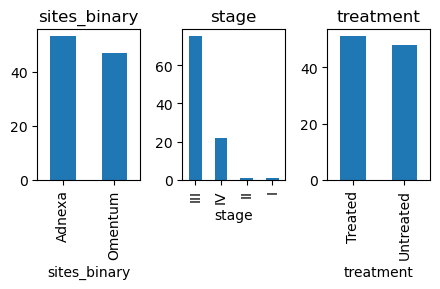

In [54]:
columns_of_interest = ['sites_binary', 'stage', 'treatment']
fig, axes = plt.subplots(1, len(columns_of_interest), figsize=(len(columns_of_interest) * 1.5, 3))
for i, column in enumerate(columns_of_interest):
    sample_metadata[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()

In [55]:
mask = (sample_metadata['sites_binary'] == 'Adnexa') & (sample_metadata['treatment'] == 'Untreated')
samples_of_interest = sample_metadata.index[mask].tolist()

(array([7.200e+01, 3.540e+02, 5.600e+02, 7.880e+02, 1.252e+03, 1.616e+03,
        2.036e+03, 2.608e+03, 3.105e+03, 3.427e+03, 3.789e+03, 4.197e+03,
        4.215e+03, 4.020e+03, 3.533e+03, 2.689e+03, 1.999e+03, 1.354e+03,
        8.840e+02, 6.310e+02, 4.120e+02, 3.010e+02, 2.240e+02, 1.820e+02,
        1.690e+02, 1.210e+02, 1.070e+02, 9.000e+01, 6.300e+01, 7.200e+01,
        5.900e+01, 4.800e+01, 4.200e+01, 4.900e+01, 3.200e+01, 3.500e+01,
        2.000e+01, 2.300e+01, 2.200e+01, 1.300e+01, 1.700e+01, 2.000e+00,
        6.000e+00, 6.000e+00, 3.000e+00, 7.000e+00, 2.000e+00, 6.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47

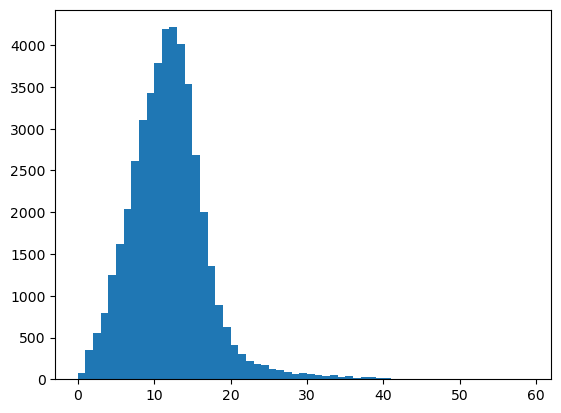

In [286]:
plt.hist(adatas[0].obsp['spatial_distances'].data * .18, bins=range(0, 60, 1))

In [56]:
import sys
sys.path.append("..")
import steamboat as sf
import steamboat.integrated_model
import torch
device = 'cuda'

In [57]:
adatas = []
for i in adata.obs['samples'].unique():
    if i in samples_of_interest:
        adatas.append(adata[adata.obs['samples'] == i])
        adatas[-1].obs['global'] = 0

C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\2334808733.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\2334808733.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\2334808733.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\2334808733.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\2334808733.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
C:\Users\l

In [58]:
adatas = sf.prep_adatas(adatas, log_norm=False)
dataset = sf.make_dataset(adatas, sparse_graph=True, regional_obs=['global'])

  0%|          | 0/27 [00:00<?, ?it/s]

Using ['global'] as regional annotations.


  0%|          | 0/27 [00:00<?, ?it/s]

In [59]:
sf.set_random_seed(0)
model = sf.integrated_model.Steamboat(adata.var_names.tolist(), n_heads=10, n_scales=3)
model = model.to(device)

In [328]:
model.fit(dataset, entry_masking_rate=0.2, feature_masking_rate=0.1, 
          flat_k_penalty=0., flat_k_penalty_args={'kind': 'cosine'},
          weight_l2_penalty=1e-5,
          max_epoch=10000, 
          loss_fun=torch.nn.HuberLoss(delta=0.1),
          opt=torch.optim.Adam, opt_args=dict(lr=0.1), stop_eps=1e-4, report_per=200, stop_tol=1000)

[2024-11-26 17:30:01,844::train::INFO] Epoch 1: train_loss 0.03023, reg 0.000002
[2024-11-26 17:31:29,164::train::INFO] Epoch 201: train_loss 0.02877, reg 0.000450
[2024-11-26 17:32:49,892::train::INFO] Epoch 401: train_loss 0.02874, reg 0.000450
[2024-11-26 17:34:11,554::train::INFO] Epoch 601: train_loss 0.02876, reg 0.000433
[2024-11-26 17:35:32,601::train::INFO] Epoch 801: train_loss 0.02875, reg 0.000440
[2024-11-26 17:36:53,339::train::INFO] Epoch 1001: train_loss 0.02873, reg 0.000451
[2024-11-26 17:36:54,572::train::INFO] Epoch 1004: train_loss 0.02875, reg 0.000449
[2024-11-26 17:36:54,573::train::INFO] Stopping criterion met.


Steamboat(
  (spatial_gather): BilinearAttention(
    (bias): NonNegBias(
      (elu): ELU(alpha=1.0)
    )
    (q): NonNegLinear(
      (elu): ELU(alpha=1.0)
    )
    (k): NonNegLinear(
      (elu): ELU(alpha=1.0)
    )
    (v): NonNegLinear(
      (elu): ELU(alpha=1.0)
    )
    (cosine_similarity): CosineSimilarity()
  )
)

C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\1816038347.py:72: RuntimeWarning: invalid value encountered in divide
  to_plot /= true_vmax
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\1816038347.py:72: RuntimeWarning: invalid value encountered in divide
  to_plot /= true_vmax
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\1816038347.py:72: RuntimeWarning: invalid value encountered in divide
  to_plot /= true_vmax
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\1816038347.py:72: RuntimeWarning: invalid value encountered in divide
  to_plot /= true_vmax
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\1816038347.py:72: RuntimeWarning: invalid value encountered in divide
  to_plot /= true_vmax
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\1816038347.py:72: RuntimeWarning: invalid value encountered in divide
  to_plot /= true_vmax
C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\1816038347.py:72: RuntimeWarning: invalid value encountered in divide
  to_plot /= true_vmax


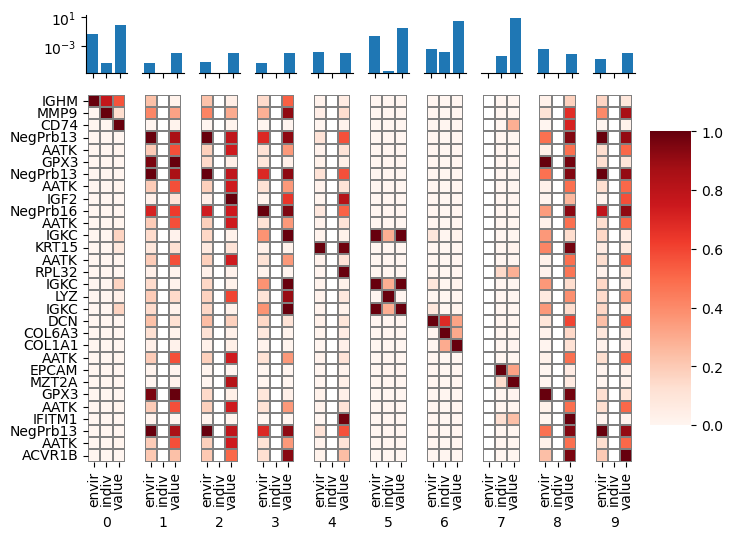

In [329]:
import numpy as np
def plot_regional_transforms(model, top: int = 3, reorder: bool = True, 
                    figsize: str | tuple[float, float] = 'auto', 
                    vmin: float = 0., vmax: float = 1.,
                    xticklabels: tuple[str, str, str] = ("envir", "indiv", 'value')):
    """Plot all metagenes

    :param model: Steamboat model
    :param top: Number of top genes per metagene to plot, defaults to 3
    :param reorder: Reorder the genes by metagene, or keep the orginal ordering, defaults to False
    :param figsize: Size of the figure, defaults to 'auto'
    :param vmin: minimum value in the color bar, defaults to 0.
    :param vmax: maximum value in the color bar, defaults to 1.
    """
    n_heads = model.spatial_gather.n_heads
    n_scales = model.spatial_gather.n_scales

    q = model.spatial_gather.q.weight.detach().cpu()
    k = model.spatial_gather.k.weight.detach().cpu()
    v = model.spatial_gather.v.weight.detach().cpu().T
    # switch = model.spatial_gather.switch().detach().cpu()

    if top > 0:
        if reorder:
            rank_v = np.argsort(-v, axis=1)[:, :top]
            rank_q = np.argsort(-q, axis=1)[:, :top]
            rank_k = np.argsort(-k, axis=1)[:, :top]
            feature_mask = {}
            for i in range(n_heads):
                for j in rank_k[i, :]:
                    feature_mask[j] = None
                for j in rank_q[i, :]:
                    feature_mask[j] = None
                for j in rank_v[i, :]:
                    feature_mask[j] = None
            feature_mask = list(feature_mask.keys())
        else:
            rank_v = rank(v)
            rank_q = rank(q)
            rank_k = rank(k)
            max_rank = np.max(np.vstack([rank_v, rank_q, rank_k]), axis=0)
            feature_mask = (max_rank > (max_rank.max() - 3))
            
        chosen_features = np.array(model.features)[feature_mask]
    else:
        feature_mask = list(range(len(model.features)))
        chosen_features = np.array(model.features)

    if figsize == 'auto':
        figsize = (n_heads * 0.49 + 2 + .5, len(chosen_features) * 0.15 + .25 + .75)
    # print(figsize)
    fig, axes = plt.subplots(2, n_heads + 1, sharey='row', sharex='col',
                                          figsize=figsize, 
                                          height_ratios=(.75, len(chosen_features) * .15 + .25))
    plot_axes = axes[1]
    bar_axes = axes[0]
    cbar_ax = plot_axes[-1].inset_axes([0.0, 0.1, 1.0, .8])
    common_params = {'linewidths': .05, 'linecolor': 'gray', 'yticklabels': chosen_features, 
                     'cmap': 'Reds', 'cbar_kws': {"orientation": "vertical"}, 'square': True,
                     'vmax': vmax, 'vmin': vmin}

    for i in range(0, n_heads):
        title = ''
        what = f'{i}'
        
        to_plot = np.vstack((k[i, feature_mask],
                             q[i, feature_mask],
                             v[i, feature_mask])).T
        
        true_vmax = to_plot.max(axis=0)
        # print(true_vmax)
        to_plot /= true_vmax
 
        bar_axes[i].bar(np.arange(len(true_vmax)) + .5, true_vmax)
        bar_axes[i].set_xticks(np.arange(len(true_vmax)) + .5, [''] * len(true_vmax))
        bar_axes[i].set_yscale('log')
        bar_axes[i].set_title(title, size=10, fontweight='bold')
        if i != 0:
            bar_axes[i].get_yaxis().set_visible(False)
        for pos in ['right', 'top', 'left']:
            if pos == 'left' and i == 0:
                continue
            else:
                bar_axes[i].spines[pos].set_visible(False)
        sns.heatmap(to_plot, xticklabels=xticklabels, ax=plot_axes[i], 
                    **common_params, cbar_ax=cbar_ax)
        plot_axes[i].set_xlabel(f"{what}")
        
    # All text straight up
    for i in range(n_heads):
        plot_axes[i].set_xticklabels(plot_axes[i].get_xticklabels(), rotation=90)

    for i in range(1, n_heads):
        plot_axes[i].get_yaxis().set_visible(False)

    # Remove duplicate cbars
    bar_axes[-1].set_visible(False)

    plot_axes[-1].get_yaxis().set_visible(False)
    plot_axes[-1].get_xaxis().set_visible(False)
    for pos in ['right', 'top', 'bottom', 'left']:
        plot_axes[-1].spines[pos].set_visible(False)
    # axes[-1].set_visible(False)

    fig.align_xlabels()
    plt.tight_layout()

plot_regional_transforms(model, top=1)

In [330]:
# Ego, local, or global?
import scipy as sp
import scipy.sparse
from tqdm.auto import tqdm
def annotate_adatas(adatas: list[sc.AnnData], dataset, model, 
                    device='cuda', get_recon=False):
    """_summary_

    :param adatas: _description_
    :param dataset: _description_
    :param model: _description_
    :param device: _description_, defaults to 'cuda'
    """
    # Safeguards
    assert len(adatas) == len(dataset), "mismatch in lenghths of adatas and dataset"
    for adata, data in zip(adatas, dataset):
        assert adata.shape[0] == data[0].shape[0], f"adata[{i}] has {adata.shape[0]} cells but dataset[{i}] has {data[0].shape[0]}."

    for i, (x, adj_list, regional_xs, regional_adj_lists) in tqdm(enumerate(dataset), total=len(dataset)):
        adj_list = adj_list.squeeze(0).to(device)
        x = x.squeeze(0).to(device)
        regional_adj_lists = [regional_adj_list.to(device) for regional_adj_list in regional_adj_lists]
        regional_xs = [regional_x.to(device) for regional_x in regional_xs]
        
        with torch.no_grad():
            res, details = model(adj_list, x, x, regional_adj_lists, regional_xs, get_details=True)
            
            if get_recon:
                adatas[i].obsm['X_recon'] = res.cpu().numpy()

            adatas[i].obsm['embq'] = details['embq'].cpu().numpy()
            
            adatas[i].obsm['embk'] = details['embk'][0].cpu().numpy()
            for j, emb in enumerate(details['embk'][1]):
                adatas[i].uns[f'embk_{j}'] = emb.cpu().numpy()
            
            adatas[i].obsm['ego_attn'] = details['attnm'][0].cpu().numpy()
            adatas[i].obsm['local_attn'] = details['attnm'][1].cpu().numpy()
            for j, matrix in enumerate(details['attnm'][2]):
                adatas[i].obsm[f'regional_attn_{j}'] = matrix.cpu().numpy()

            # local attention (as graph)
            for j in range(model.spatial_gather.n_heads):
                w = details['attnp'][1].cpu().numpy()[:, j, :].flatten()
                # print(details['attnp'][1].cpu().shape)
                # print(len(w))
                uv = adj_list.cpu().numpy()
                u = uv[0]
                v = uv[1]
                # print(len(u))
                # print(len(v))
                if uv.shape[0] == 3: # masked for unequal neighbors
                    m = (uv[2] > 0)
                    w, u, v = w[m], u[m], v[m]
                adatas[i].obsp[f'local_attn_{j}'] = sp.sparse.csr_matrix((w, (u, v)), 
                                                                            shape=(adatas[i].shape[0], 
                                                                                adatas[i].shape[0]))
            
annotate_adatas(adatas, dataset, model, get_recon=False)

  0%|          | 0/27 [00:00<?, ?it/s]

In [63]:
# Embedding for cell-cell interaction?
# Could there be two pairs of cell types with similar interaction?
# E.g.???

In [331]:
adatas[i].obsm['ego_attn'].shape

(5660, 10)

In [332]:
# Ego, local, or global?
# 1. Only matters if the head is doing something ()
i = 0

quantile = 1 - 0.01

ego = np.quantile(adatas[i].obsm['ego_attn'], quantile, axis=0)
local = np.quantile(adatas[i].obsm['local_attn'], quantile, axis=0)
regional = np.quantile(adatas[i].obsm['regional_attn_0'], quantile, axis=0)

[Text(0, 0.5, 'ego'), Text(0, 1.5, 'local'), Text(0, 2.5, 'regional')]

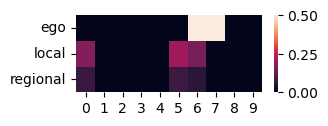

In [333]:
fig, ax = plt.subplots(figsize=(3, 1))
sns.heatmap(np.vstack([ego, local, regional]), vmax=.5, ax=ax)
ax.set_yticklabels(['ego', 'local', 'regional'], rotation=0)

C:\Users\lshh\AppData\Local\Temp\ipykernel_16096\2118475821.py:3: RuntimeWarning: invalid value encountered in divide
  sns.heatmap(matrix / matrix.sum(axis=0), vmax=.5, ax=ax)


[Text(0, 0.5, 'ego'), Text(0, 1.5, 'local'), Text(0, 2.5, 'regional')]

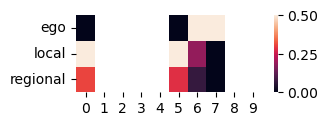

In [334]:
fig, ax = plt.subplots(figsize=(3, 1))
matrix = np.vstack([ego, local, regional])
sns.heatmap(matrix / matrix.sum(axis=0), vmax=.5, ax=ax)
ax.set_yticklabels(['ego', 'local', 'regional'], rotation=0)

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


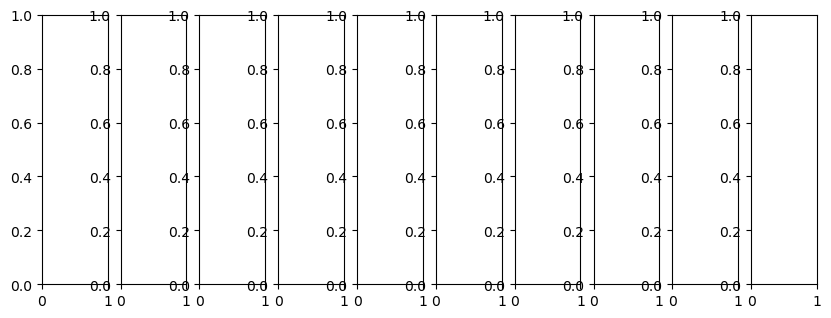

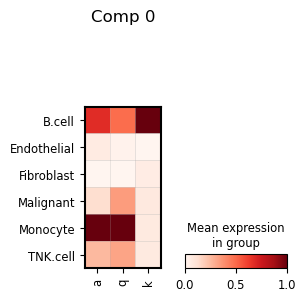

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


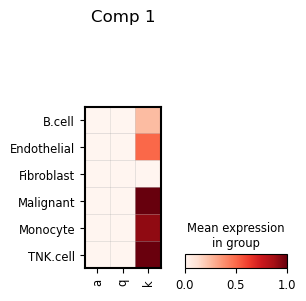

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


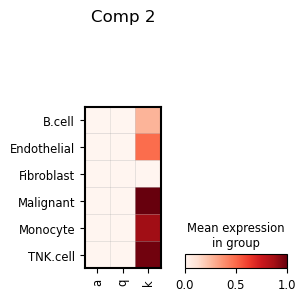

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


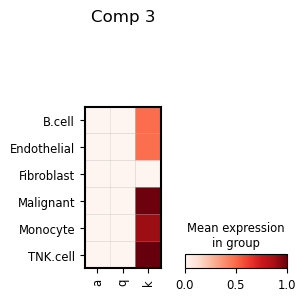

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


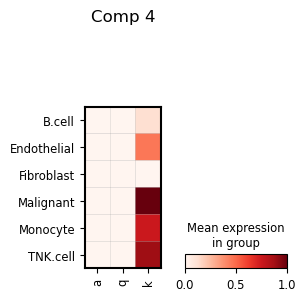

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


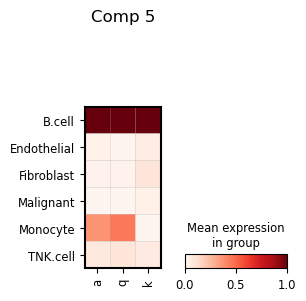

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


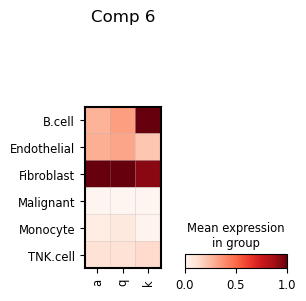

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


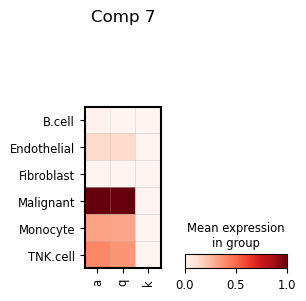

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


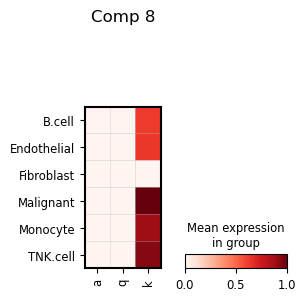

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


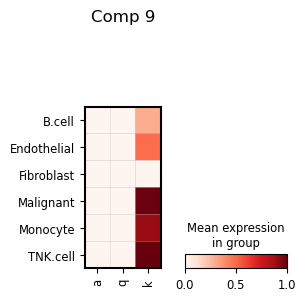

In [335]:
adatas[0].obs['cell.types.nolc'] = adatas[0].obs['cell.types'].str.replace('_LC', '')

fig, axes = plt.subplots(1, 10, figsize=(10, 3.5))
for i_comp in range(10):
    adatas[0].obs['q'] = adatas[0].obsm['embq'][:, i_comp]
    adatas[0].obs['k'] = adatas[0].obsm['embk'][:, i_comp]
    adatas[0].obs['a'] = adatas[0].obsm['ego_attn'][:, i_comp]

    temp_adata = adatas[0].copy()
    good_classes = adatas[0].obs['cell.types.nolc'].value_counts()
    good_classes = good_classes[good_classes > temp_adata.shape[0] * 0.01].index.to_list()
    temp_adata = temp_adata[temp_adata.obs['cell.types.nolc'].isin(good_classes)]

    #plt.subplot(1, 10, i_comp + 1)
    sc.pl.matrixplot(temp_adata, ['a', 'q', 'k'], 'cell.types.nolc', standard_scale='var', cmap='Reds', title=f'Comp {i_comp}')

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


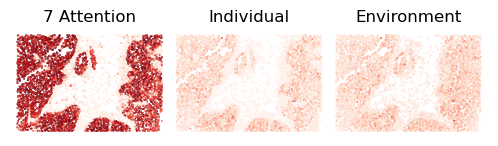

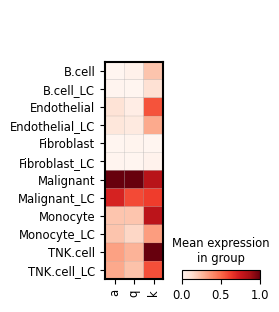

In [ ]:
# 7 is the most ego, what is it?
i_comp = 7
adatas[0].obs['q'] = adatas[0].obsm['embq'][:, i_comp]
adatas[0].obs['k'] = adatas[0].obsm['embk'][:, i_comp]
adatas[0].obs['a'] = adatas[0].obsm['ego_attn'][:, i_comp]

sq.pl.spatial_scatter(adatas[0], color=['a', 'q', 'k'], shape=None, figsize=(2, 2), size=.25, 
                        legend_fontsize=9, cmap='Reds', ncols=3, colorbar=False, vmin=0., 
                        wspace=.0, outline=False, frameon=False, 
                        title=[f'{i_comp} Attention', 'Individual', 'Environment'])

temp_adata = adatas[0].copy()
good_classes = adatas[0].obs['cell.types'].value_counts()
good_classes = good_classes[good_classes > temp_adata.shape[0] * 0.01].index.to_list()
temp_adata = temp_adata[temp_adata.obs['cell.types'].isin(good_classes)]

fig, ax = plt.subplots(figsize=(2, 3.5))
sc.pl.matrixplot(temp_adata, ['a', 'q', 'k'], 'cell.types', standard_scale='var', ax=ax, cmap='Reds')

In [68]:
# 3, 5, 6 are the most regional & local
for d in range(10):
    sample_metadata[f'embk_0_{d}'] = float('nan')
    for i in range(len(adatas)):
        val = adatas[i].uns['embk_0'][0, d]
        key = adatas[i].obs.samples.astype(str).unique().item()
        sample_metadata.loc[key, f'embk_0_{d}'] = val

In [69]:
sample_metadata2 = sample_metadata.loc[samples_of_interest]
sample_metadata2.head().style

,dataset,platform,n_cells,median_tpc,mean_tpc,TMA,patients,sites_binary,age,stage,treatment,1L,parpi,immunotherapy,fu_time1,fu_time2,outcome,pfs,BRCA1_Somatic,BRCA2_Somatic,TP53_Somatic,BRCA1_Germline,BRCA2_Germline,TP53_Germline,tmb,embk_0_0,embk_0_1,embk_0_2,embk_0_3,embk_0_4,embk_0_5,embk_0_6,embk_0_7,embk_0_8,embk_0_9
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SMI_T10_F001,Discovery,SMI,5660,205.000000,238.675618,TMA 10,HGSC1,Adnexa,58.000000,III,Untreated,1.000000,1.000000,No,910.000000,775.000000,Alive,775.000000,WT,P,P,US,US,US,6.800000,0.004190,0.001006,0.004040,0.026916,0.003612,0.026977,0.008586,0.000000,0.001522,0.006054
SMI_T10_F002,Discovery,SMI,8821,364.000000,393.318671,TMA 10,HGSC7,Adnexa,58.000000,III,Untreated,1.000000,1.000000,No,1153.000000,1013.000000,Alive,1013.000000,P,WT,LP,US,US,US,0.530000,0.002860,0.000827,0.002287,0.004437,0.006370,0.009315,0.002143,0.000000,0.001244,0.003394
SMI_T10_F006,Discovery,SMI,5295,384.000000,446.908404,TMA 10,HGSC2,Adnexa,36.000000,IV,Untreated,3.000000,1.000000,"on atezolizumab vs placebo, stable",1492.000000,1331.000000,Alive,1331.000000,P,WT,P,US,US,US,9.500000,0.003595,0.004227,0.002734,0.008206,0.005652,0.039679,0.006089,0.000000,0.006916,0.003960
SMI_T10_F014,Discovery,SMI,5944,395.000000,450.930855,TMA 10,HGSC11,Adnexa,54.000000,III,Untreated,1.000000,1.000000,No,1036.000000,942.000000,Alive,942.000000,WT,WT,P,B,US,US,6.320000,0.004569,0.001085,0.003365,0.005001,0.007307,0.011418,0.011534,0.000000,0.001588,0.004993
SMI_T11_F001,Discovery,SMI,2212,109.000000,123.105335,TMA 11,HGSC16,Adnexa,66.000000,IV,Untreated,3.000000,2.000000,No,1026.000000,873.000000,Dead (disease),709.000000,WT,WT,P,US,US,US,3.200000,0.001727,0.000682,0.002741,0.015011,0.001942,0.014870,0.005248,0.000000,0.000998,0.010358


In [70]:
sample_metadata2['pfs']

profile
SMI_T10_F001     775.0
SMI_T10_F002    1013.0
SMI_T10_F006    1331.0
SMI_T10_F014     942.0
SMI_T11_F001     709.0
SMI_T11_F002     844.0
SMI_T11_F004    1076.0
SMI_T11_F008    1304.0
SMI_T11_F009     639.0
SMI_T11_F011    1348.0
SMI_T11_F020     737.0
SMI_T12_F005     700.0
SMI_T12_F007     959.0
SMI_T12_F009       NaN
SMI_T12_F013       NaN
SMI_T12_F015     343.0
SMI_T12_F018     210.0
SMI_T13_F005     245.0
SMI_T13_F009     474.0
SMI_T13_F011     706.0
SMI_T13_F018    1409.0
SMI_T13_F019    3420.0
SMI_T14_F002     657.0
SMI_T14_F005     233.0
SMI_T14_F015     710.0
SMI_T14_F018     412.0
SMI_T14_F019     867.0
Name: pfs, dtype: float64

<Axes: xlabel='stage', ylabel='pfs'>

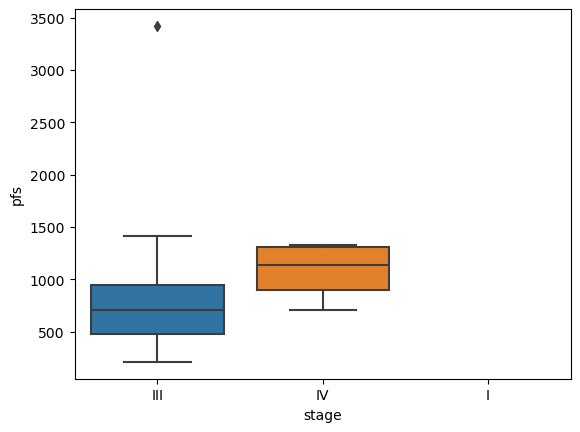

In [71]:
sns.boxplot(sample_metadata2, x='stage', y='pfs')

In [74]:
def test_helper(df, x, y, groups, test=sp.stats.mannwhitneyu):
    assert len(groups) == 2
    a = (df[x] == groups[0])
    b = (df[x] == groups[1])
    return test(df.loc[a, y].dropna(), df.loc[b, y].dropna())

test_helper(df=sample_metadata2, x='stage', y='pfs', groups=['III', 'IV'], test=sp.stats.mannwhitneyu)

MannwhitneyuResult(statistic=22.0, pvalue=0.15367588932806325)

In [75]:
for d in range(10):
    print(d, test_helper(df=sample_metadata2, x='stage', y=f'embk_0_{d}', groups=['III', 'IV'], test=sp.stats.mannwhitneyu).pvalue)

0 0.4706354515050167
1 0.5598662207357858
2 0.8107023411371235
3 0.19665551839464884
4 0.09591973244147159
5 0.38916387959866217
6 0.25190635451505017
7 0.6560535117056855
8 0.514515050167224
9 0.3161204013377926


In [76]:
for d in range(10):
    a = sample_metadata2['pfs']
    b = sample_metadata2[f'embk_0_{d}']
    na_mask = a.isna()
    a = a[~na_mask]
    b = b[~na_mask]
    res = sp.stats.spearmanr(a, b)
    print(f'{d}: f = {res.statistic:.2f}, p = {res.pvalue:.2f}')

0: f = 0.33, p = 0.11
1: f = -0.05, p = 0.80
2: f = -0.12, p = 0.57
3: f = 0.48, p = 0.02
4: f = -0.35, p = 0.09
5: f = 0.35, p = 0.09
6: f = 0.30, p = 0.14
7: f = -0.11, p = 0.62
8: f = -0.04, p = 0.84
9: f = 0.15, p = 0.46


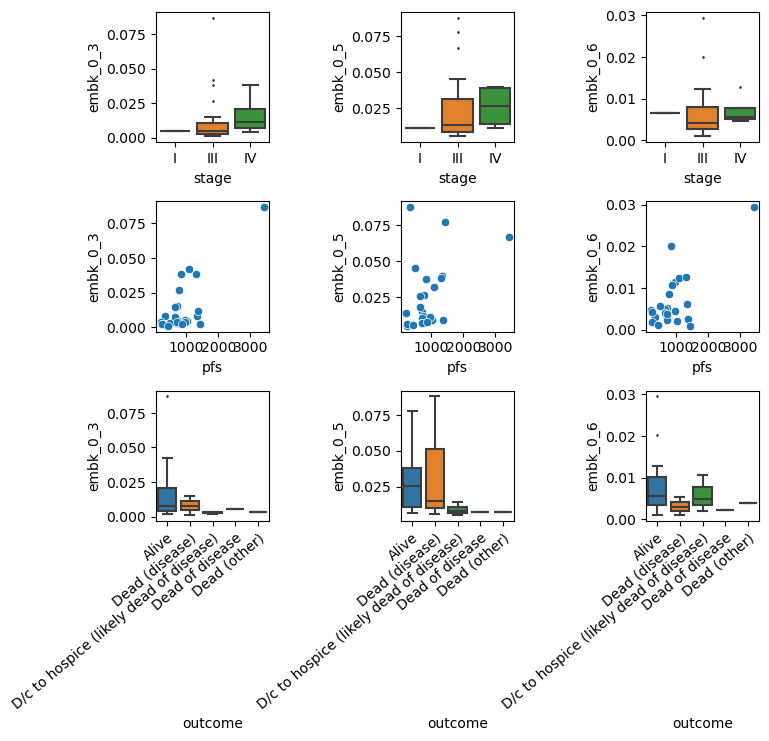

In [77]:
ds = [3, 5, 6]
cols = ['stage', 'pfs', 'outcome']
params = {'stage': {'order': ['I', 'III', 'IV']}}
rotations = {'outcome': 40}
fig, axes = plt.subplots(len(cols), len(ds), figsize=(2.5 * len(ds), len(cols) * 2.5), squeeze=False)
for plt_j, d in enumerate(ds):
    for plt_i, col in enumerate(cols):
        ax = axes[plt_i, plt_j]
        param = params.get(col, {})
        if sample_metadata2[col].dtype == float:
            sns.scatterplot(sample_metadata2, x=col, y=f'embk_0_{d}', ax=ax, **param)
        else: # categorical or strings
            sns.boxplot(sample_metadata2, x=col, y=f'embk_0_{d}', ax=ax, fliersize=1, **param)
            if col in rotations:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=rotations[col], ha='right', rotation_mode ='anchor')
plt.tight_layout()

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


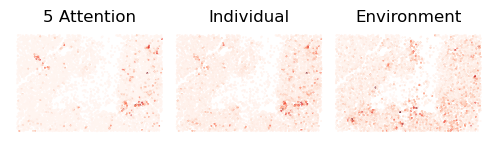

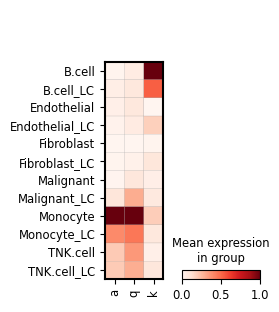

In [78]:
# 3, 5, 6 are the most regional & local
i_comp = 5
adatas[0].obs['q'] = adatas[0].obsm['embq'][:, i_comp]
adatas[0].obs['k'] = adatas[0].obsm['embk'][:, i_comp]
adatas[0].obs['a'] = adatas[0].obsm['ego_attn'][:, i_comp]

sq.pl.spatial_scatter(adatas[0], color=['a', 'q', 'k'], shape=None, figsize=(2, 2), size=.25, 
                        legend_fontsize=9, cmap='Reds', ncols=3, colorbar=False, vmin=0., 
                        wspace=.0, outline=False, frameon=False, 
                        title=[f'{i_comp} Attention', 'Individual', 'Environment'])

temp_adata = adatas[0].copy()
good_classes = adatas[0].obs['cell.types'].value_counts()
good_classes = good_classes[good_classes > temp_adata.shape[0] * 0.01].index.to_list()
temp_adata = temp_adata[temp_adata.obs['cell.types'].isin(good_classes)]

fig, ax = plt.subplots(figsize=(2, 3.5))
sc.pl.matrixplot(temp_adata, ['a', 'q', 'k'], 'cell.types', standard_scale='var', ax=ax, cmap='Reds')

In [195]:
# What are some possible pathways between B cells and monocytes?
lrdb_full = pd.read_excel("G:/data/HGSC/sample_metadata.xlsx", index_col=None, sheet_name='Table 5c', skiprows=1)
lrdb_full = lrdb_full[(lrdb_full['GeneA'].isin(adatas[0].var_names) & 
                       lrdb_full['GeneB'].isin(adatas[0].var_names))]
lrdb_full.index = lrdb_full['PairID']
lrdb_full

,GeneA,GeneB,PairID,Ref
PairID,,,,
CXCL1_CXCR2,CXCL1,CXCR2,CXCL1_CXCR2,Browaeys2020_NicheNet
CXCL2_CXCR2,CXCL2,CXCR2,CXCL2_CXCR2,Browaeys2020_NicheNet
CXCL3_CXCR2,CXCL3,CXCR2,CXCL3_CXCR2,Browaeys2020_NicheNet
CXCL5_CXCR2,CXCL5,CXCR2,CXCL5_CXCR2,Browaeys2020_NicheNet
CXCR2_PPBP,CXCR2,PPBP,CXCR2_PPBP,Browaeys2020_NicheNet
...,...,...,...,...
CD4_HLA-DPB1,CD4,HLA-DPB1,CD4_HLA-DPB1,Added
CD4_HLA-DQA1,CD4,HLA-DQA1,CD4_HLA-DQA1,Added
CD4_HLA-DQB1,CD4,HLA-DQB1,CD4_HLA-DQB1,Added


In [219]:
# import gseapy
# msig = gseapy.Msigdb()
# gmt = msig.get_gmt(category='c2.all', dbver="2024.1.Hs") | msig.get_gmt(category='c5.all', dbver="2024.1.Hs")

# monocyte_subset = set()
# for i in gmt:
#     if 'MONOCYT' in i:
#         for j in gmt[i]:
#             if j in adatas[0].var_names:
#                 monocyte_subset.add(j)

# bcell_subset = set()
# for i in gmt:
#     if 'BCELL' in i or 'B_CELL' in i:
#         for j in gmt[i]:
#             if j in adatas[0].var_names:
#                  bcell_subset.add(j)

# print(len(monocyte_subset), len(bcell_subset))

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\gseapy\msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\gseapy\msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


139 198


In [232]:
# lrdb = lrdb_full[(lrdb_full['GeneA'].isin(monocyte_subset) & lrdb_full['GeneB'].isin(bcell_subset))]
lrdb = lrdb_full

In [233]:
n_heads = model.spatial_gather.n_heads
var = pd.DataFrame(np.vstack([model.spatial_gather.k.weight.detach().cpu().numpy(),
                              model.spatial_gather.q.weight.detach().cpu().numpy()]).T,
                   index=adata.var_names,
                   columns=[f'k_{i}' for i in range(n_heads)] + [f'q_{i}' for i in range(n_heads)])

In [274]:
d = 10
lr_df = pd.DataFrame(var.loc[lrdb['GeneA'], f'q_{d}'].values * var.loc[lrdb['GeneB'], f'k_{d}'].values,
                     index=lrdb.index, columns=['score'])

observation = lr_df['score'].sum()

null_distr_0 = np.outer(var[f'q_{d}'].values, var[f'k_{d}'].values).flatten()
# null_distr_0 = np.outer(var.loc[lrdb_full['GeneA'], f'k_{d}'].values, 
#                       var.loc[lrdb_full['GeneB'], f'q_{d}'].values).flatten()
m = 5000
null_distr = [np.sum(np.random.choice(null_distr_0, size=lr_df.shape[0])) for i in range(m)]
(null_distr > observation).sum() / m
# lr_df['p'] = np.mean(null_distr[:, None] >= lr_df['score'].values, axis=0)
# lr_df['p_adj'] = sp.stats.false_discovery_control(lr_df['p'])
# lr_df.sort_values('p_adj')

KeyError: 'q_10'

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


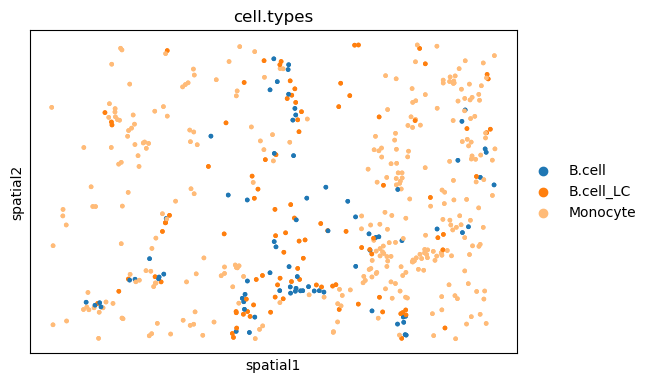

In [ ]:
sq.pl.spatial_scatter(adatas[0], color='cell.types', groups=['B.cell', 'B.cell_LC', 'Monocyte'], shape=None)

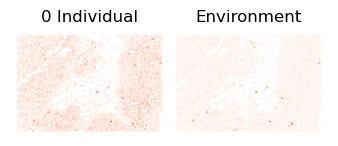

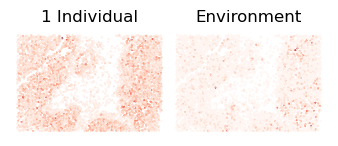

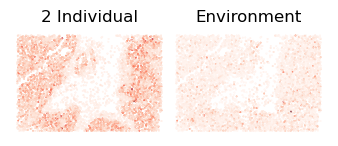

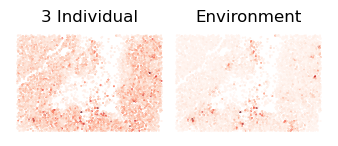

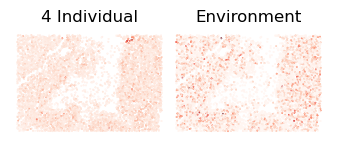

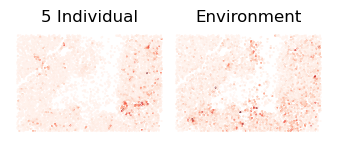

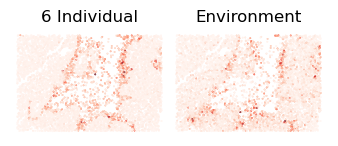

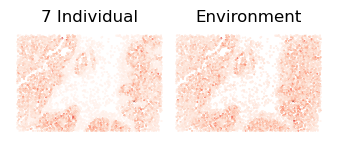

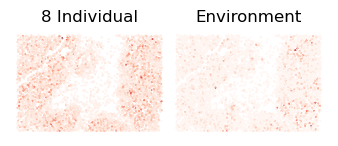

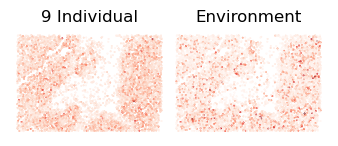

In [ ]:
for i_comp in range(10):
    adatas[0].obs['q'] = adatas[0].obsm['embq'][:, i_comp]
    adatas[0].obs['k'] = adatas[0].obsm['embk'][:, i_comp]
    
    sq.pl.spatial_scatter(adatas[0], color=['q', 'k'], shape=None, figsize=(2, 2), size=.25, 
                          legend_fontsize=9, cmap='Reds', ncols=2, colorbar=False, vmin=0., 
                          wspace=.0, outline=False, frameon=False, 
                          title=[f'{i_comp} Individual', 'Environment'])
